In [1]:
# Initial Setup:
# Import all the libraries we need

import matplotlib.pyplot as plt
# plt.tick_params(left=False, labelleft=False) #remove ticks

import numpy as np
import csv
import math
import random
import pandas as pd

# reload imports
%reload_ext autoreload
%autoreload 2

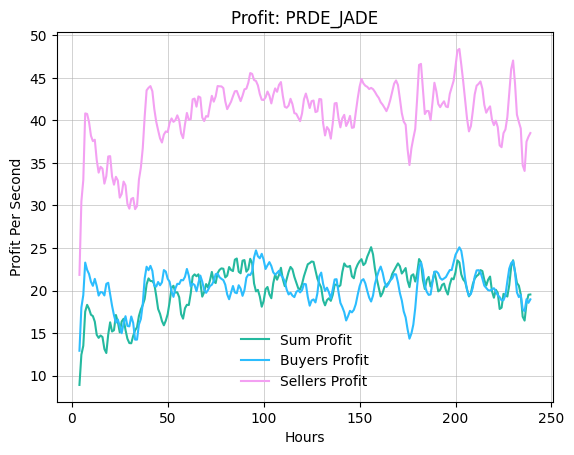

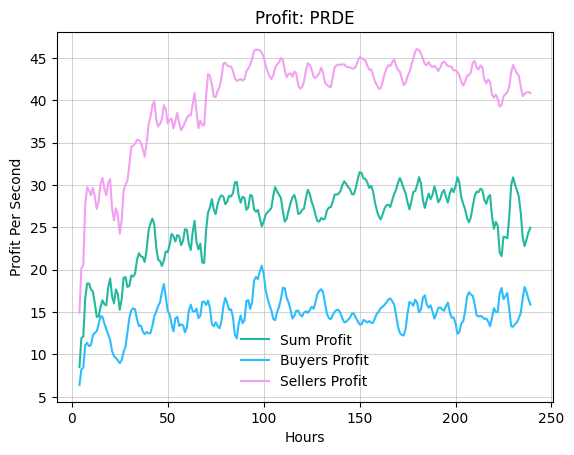

PRDE_JADE k=8, F=1.9  41.2137319
PRDE k=8, F=1.9  42.5406535


In [36]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#24B99F'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB91_Brown= '#98501C'
CB91_Red = '#D43334'

def plot_csv(filename, other):
    df = pd.read_csv( filename,header=None,)
    jade_new_df_buyer = pd.DataFrame()
    jade_new_df_seller = pd.DataFrame()
    prde_new_df_buyer = pd.DataFrame()
    prde_new_df_seller = pd.DataFrame()
    
    for row in range(0,len(df.index)):
        jade_b_sum = 0
        jade_s_sum = 0
        prde_b_sum = 0
        prde_s_sum = 0
        
        for col in range (8, 219 ,1):
            if type(df.loc[row][col]) == str:
                if(df.loc[row][col].strip() == other):
                    jade_b_sum += df.loc[row][col+4]
                elif(df.loc[row][col].strip() == 'PRDE'):
                    prde_b_sum += df.loc[row][col+4]
                
        jade_new_df_buyer.loc[len(jade_new_df_buyer.index), 0] = jade_b_sum
        prde_new_df_buyer.loc[len(prde_new_df_buyer.index), 0] = prde_b_sum

        for col in range (225, 428,1):
            if type(df.loc[row][col]) == str:
                if(df.loc[row][col].strip() == other):
                    jade_s_sum +=df.loc[row][col+4]
                elif(df.loc[row][col].strip() == 'PRDE'):
                    prde_s_sum +=df.loc[row][col+4]

        jade_new_df_seller.loc[len(jade_new_df_seller.index), 0] = jade_s_sum
        prde_new_df_seller.loc[len(prde_new_df_seller.index), 0] = prde_s_sum
        
    jade_buyers_sma = jade_new_df_buyer.loc[:,0].rolling(5).mean()
    jade_sellers_sma = jade_new_df_seller.loc[:,0].rolling(5).mean()
    jade_total_sma =  jade_buyers_sma + jade_sellers_sma
    
    prde_buyers_sma = prde_new_df_buyer.loc[:,0].rolling(5).mean()
    prde_sellers_sma = prde_new_df_seller.loc[:,0].rolling(5).mean()
    prde_total_sma =  prde_buyers_sma + prde_sellers_sma
    
    # Comment out if running compare_pps_different_k() ---------------------------------
    plt.figure(1)
    t_period = list(range(0,len(jade_buyers_sma.index)))
    plt.plot(t_period, jade_buyers_sma, color=CB91_Green, label='Sum Profit') 
    plt.plot(t_period, jade_sellers_sma, color=CB91_Blue, label='Buyers Profit') 
    plt.plot(t_period, jade_total_sma, color=CB91_Pink, label='Sellers Profit') 
    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title(f"Profit: {other}")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    
    plt.figure(2)
    t_period = list(range(0,len(prde_buyers_sma.index)))
    plt.plot(t_period, prde_buyers_sma, color=CB91_Green, label='Sum Profit') 
    plt.plot(t_period, prde_sellers_sma, color=CB91_Blue, label='Buyers Profit') 
    plt.plot(t_period, prde_total_sma, color=CB91_Pink, label='Sellers Profit') 
    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title("Profit: PRDE")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    
    # save figures
    # figure_filename = (f'dynamic_market/figures/change_k/Change_K%02d_F{f_value}.png' % (k_value))
    # plt.savefig(figure_filename)
    plt.show()

    # -------------------------------------------------------------------------------
    return jade_total_sma.fillna(0).to_numpy(), prde_total_sma.fillna(0).to_numpy()
    # return

prdevsbest = 'improved_outputs/PRDE_vs_BEST1/trail1'
prdevsjade ='improved_outputs/PRDE_vs_JADE/archive/trail1'

# best_best_sma, prde_best_sma = plot_csv(prdevsbest+'_strats.csv',  'PRDE_BEST')
jade_best_sma, prde_best_sma2 = plot_csv(prdevsjade+'_strats.csv',  'PRDE_JADE')

# print("PRDE_BEST1 k=8, F=1.9 ", np.median(best_best_sma))
# print("PRDE k=8, F=1.9 ", np.median(prde_best_sma))
# print("\n")
print("PRDE_JADE k=8, F=1.9 ", np.median(jade_best_sma))
print("PRDE k=8, F=1.9 ", np.median(prde_best_sma2))